In [97]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [98]:
data = np.load('/Users/mrbinit/Downloads/archive/olivetti_faces.npy')
target = np.load('/Users/mrbinit/Downloads/archive/olivetti_faces_target.npy')

In [99]:
print(" There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))) )
print("the size of each image {}x{}".format(data.shape[1], data.shape[2]))
print("Pixel values were scaled to [0,1] like: ",format(data[0][0,:4]))

 There are 400 images in the dataset
There are 40 unique targets in the dataset
the size of each image 64x64
Pixel values were scaled to [0,1] like:  [0.30991736 0.3677686  0.41735536 0.44214877]


In [100]:
print("unique targeted number:", np.unique(target))

unique targeted number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [101]:
import matplotlib.pyplot as plt 
def show_40_distinct_people(images, unique_ids):
    fig, axarr = plt.subplots(nrows = 4, ncols = 10 , figsize = (18, 9))
    axarr = axarr.flatten()
    for unique_id in unique_ids:
        image_index = unique_id * 10
        axarr[unique_id].imshow(images[image_index], cmap = 'gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id : {}".format(unique_id))
    plt.suptitle('there are 40 distinct people in the dataset')


This code defines a function called show_40_distinct_people that takes in two arguments: images, which is a list of images, and unique_ids, which is a list of unique identifiers for each person.

The function creates a figure with a grid of subplots arranged in 4 rows and 10 columns. It then iterates over the unique IDs and displays the corresponding image for each ID on a subplot. The images are displayed in grayscale.

Finally, the function adds a title to each subplot indicating the face ID, and a main title to the entire figure indicating the number of distinct people in the dataset.

The function is then called with the data (labeled data) and target (unlabeled data) as arguments to display the images of the 40 distinct people in the dataset.

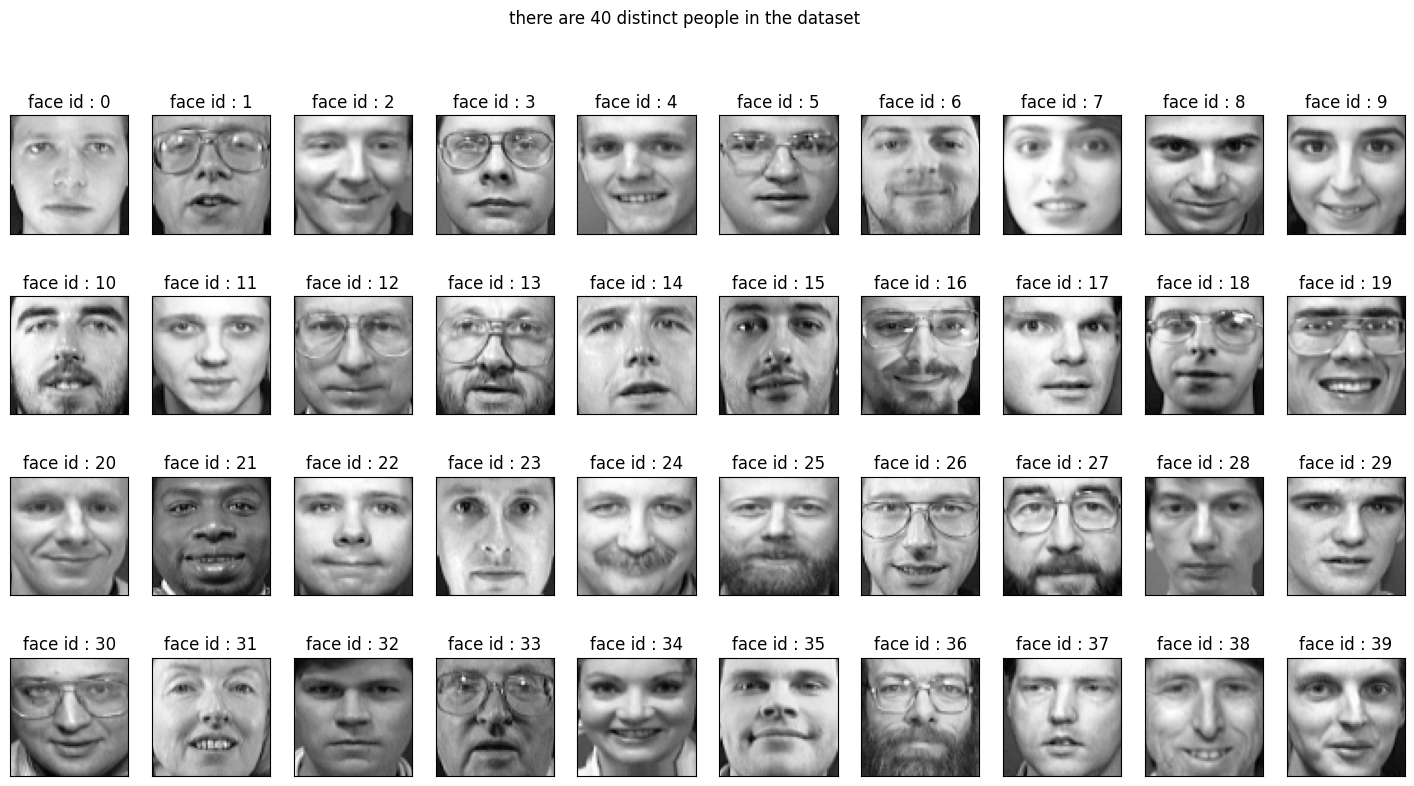

In [102]:
show_40_distinct_people(data, np.unique(target))

In [103]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

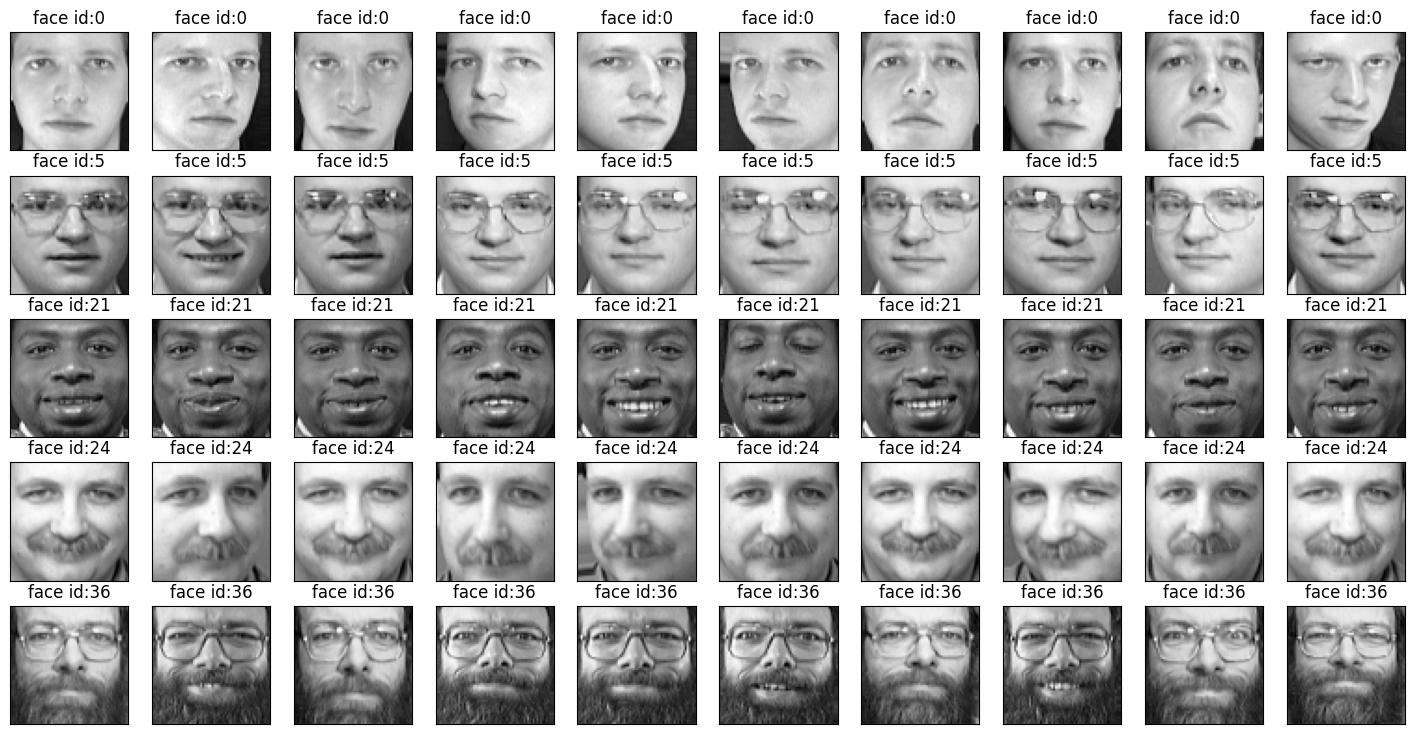

In [104]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

In [105]:
X = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))

The new shape is a 2-dimensional array where the number of rows is equal to the number of samples (images), and the number of columns is equal to the total number of pixels in each image.

In [106]:
print("X shape:", X.shape)

X shape: (400, 4096)


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size= 0.3, stratify= target, random_state= 42)
print("X_train shape",  X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Number of samples for each classes'}, xlabel='subject ids'>

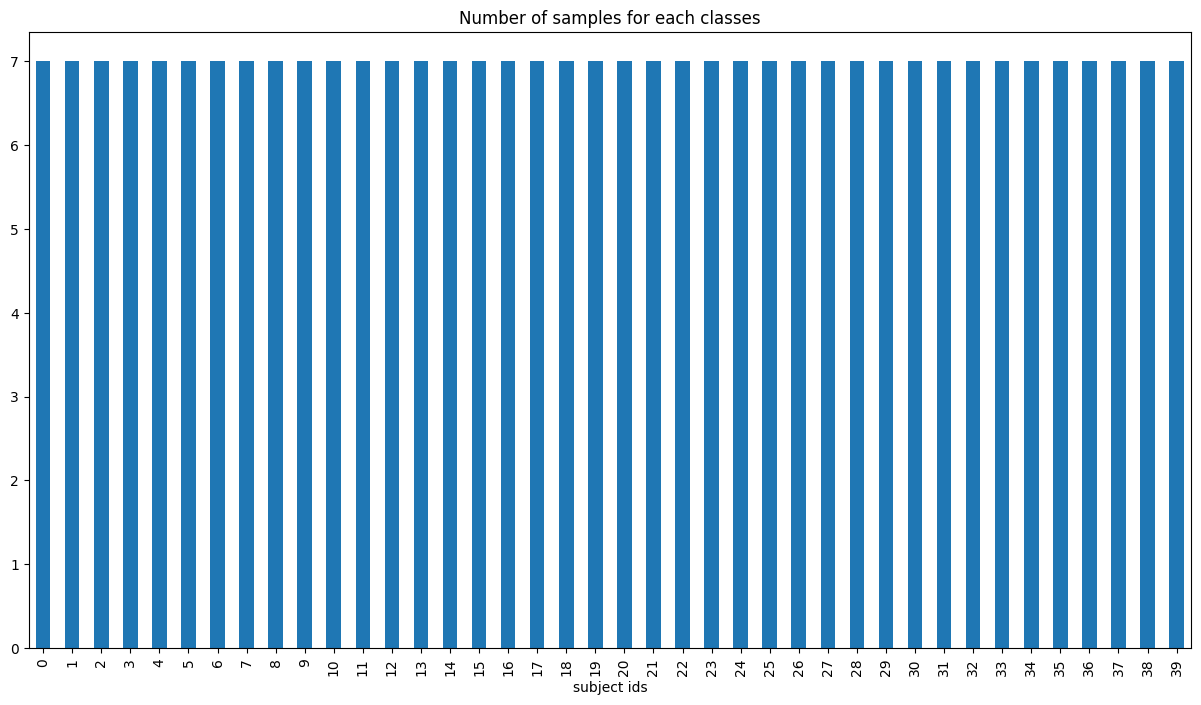

In [109]:
y_frame = pd.DataFrame()
y_frame['subject ids'] = y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize = (15, 8), title = "Number of samples for each classes")

In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA(n_components= 2)
pca.fit(X)
X_pca = pca.transform(X)


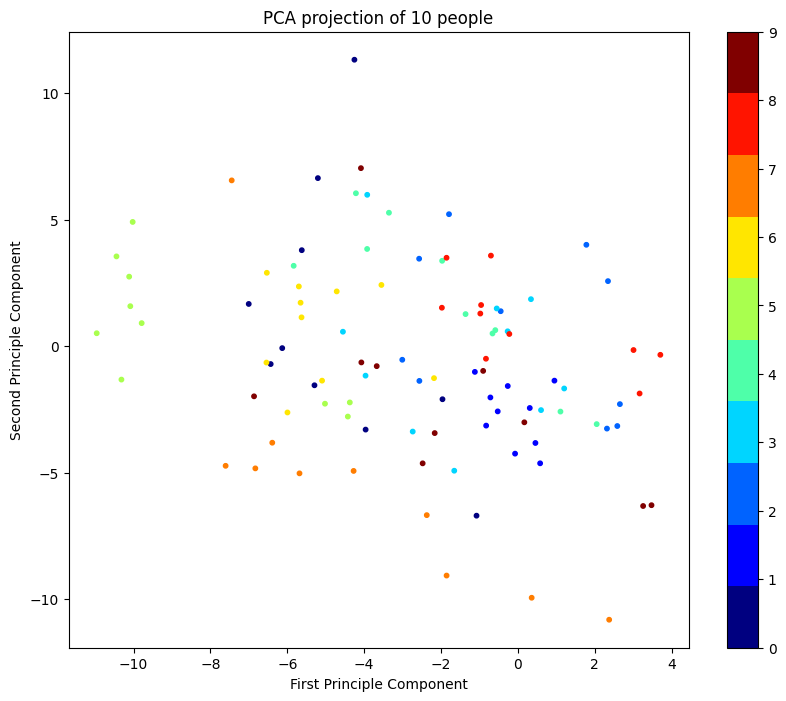

In [112]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

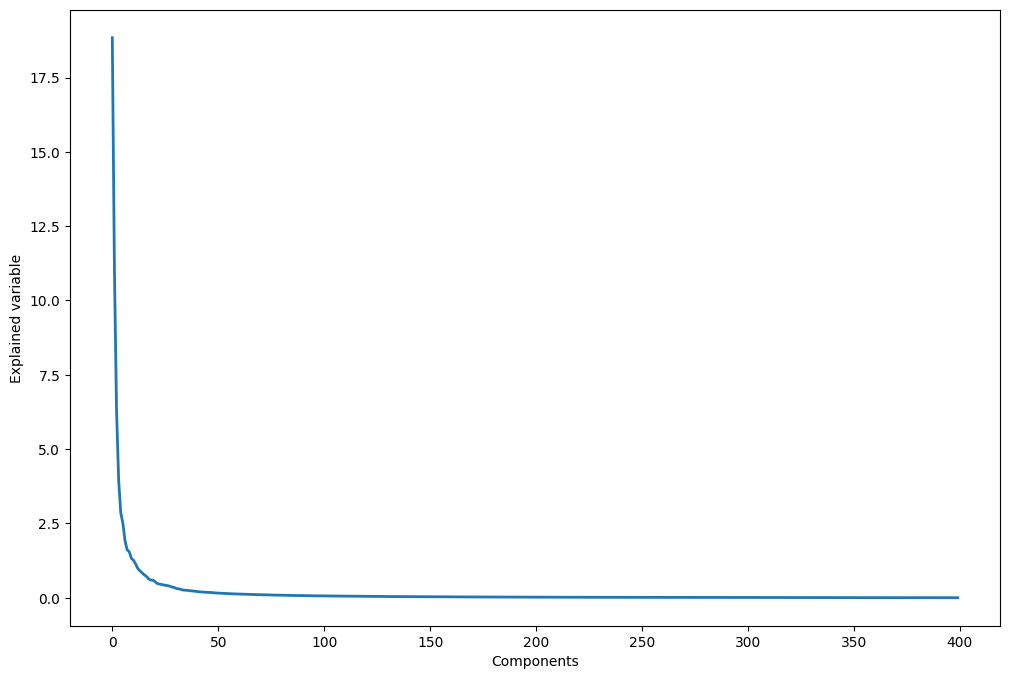

In [113]:
pca = PCA()
pca.fit(X)
plt.figure(1, figsize = (12, 8))
plt.plot(pca.explained_variance_, linewidth = 2)

plt.xlabel("Components")
plt.ylabel("Explained variable")
plt.show()

In [114]:
n_components=90
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

Text(0.5, 1.0, 'Average face')

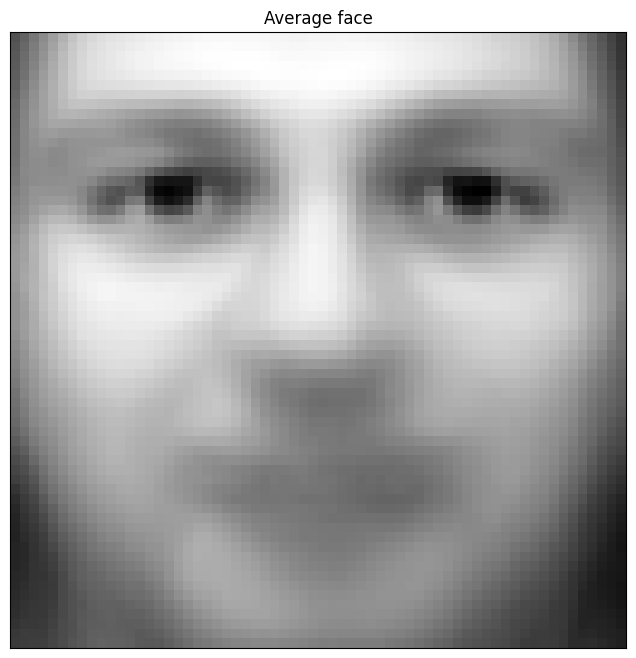

In [115]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
ax.imshow(pca.mean_.reshape((64, 64)), cmap = "gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average face')

Text(0.5, 0.98, 'All Eigen Faces')

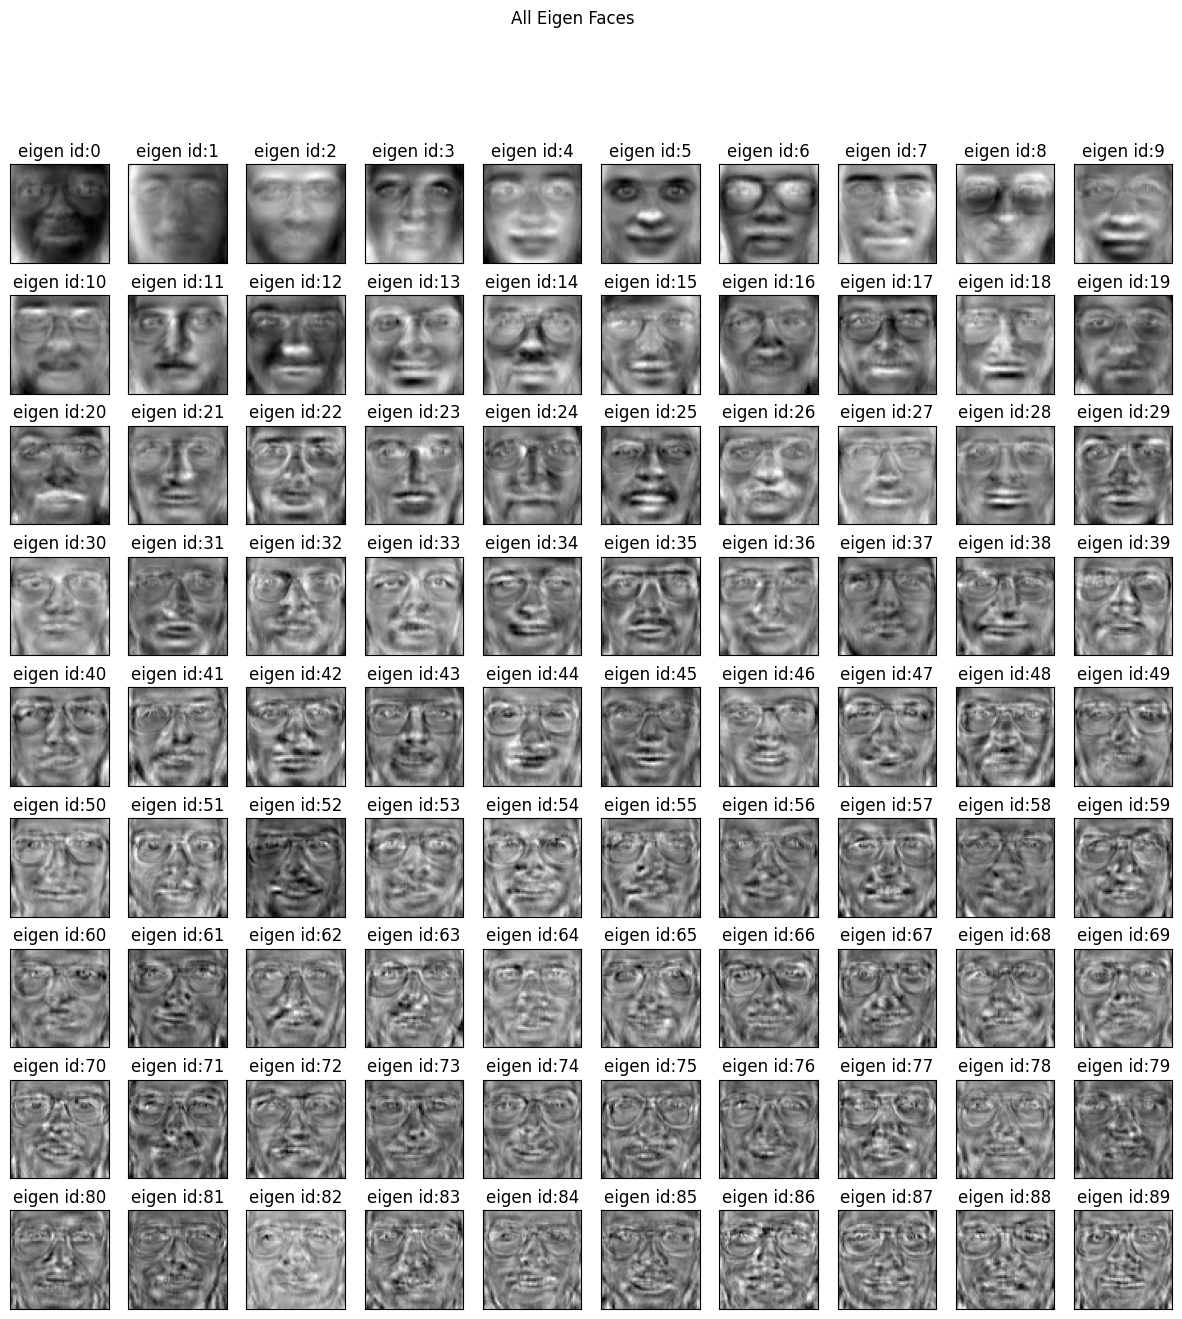

In [116]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

number_of_eigenfaces = len(pca.components_): This calculates the number of eigenfaces by getting the length of the components array obtained from PCA. Each component represents an eigenface.



eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2])): This reshapes the components array into a 3D array where each element represents an eigenface. The dimensions of the array are (number_of_eigenfaces, width, height), where width and height are the dimensions of each face image in the dataset.

In [117]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [118]:
from sklearn.svm import SVC
from sklearn import metrics

In [119]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuruacy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuruacy: 0.98


In [120]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [121]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [122]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))


for name, model in models:
    clf = model
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    print( "{} Result".format(name))
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
    print()

LR Result
Accuracy score:0.96

NB Result
Accuracy score:0.87

KNN Result
Accuracy score:0.67

DT Result
Accuracy score:0.50

SVM Result
Accuracy score:0.98



In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [124]:
pca = PCA(n_components= n_components, whiten = True)
pca.fit(X)
X_pca = pca.transform(X)
for name, model in models:
    kfold = KFold(n_splits= 5, shuffle= True, random_state= 42)
    cv_score = cross_val_score(model, X_pca, target, cv = kfold)
    print("{} mean crossvaliudation score {:.2f}".format(name, cv_score.mean()))

LR mean crossvaliudation score 0.93
NB mean crossvaliudation score 0.75
KNN mean crossvaliudation score 0.67
DT mean crossvaliudation score 0.47
SVM mean crossvaliudation score 0.87


this shows logistic regression is performing well

In [125]:
lr=LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred=lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.96


In [126]:
print("Classification report : {}".format(metrics.classification_report(y_test, y_pred)))

Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

In [127]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 40, covariance_type= 'full')
gmm.fit(X_train_pca)
gmm_aic = gmm.aic(X_train_pca)
gmm_bic = gmm.bic(X_train_pca)

'full': Each component has its own general covariance matrix. This is the most flexible option but requires estimating a separate covariance matrix for each component.


'tied': All components share the same general covariance matrix. This reduces the number of parameters to estimate but assumes that all components have the same shape and size.


'diag': Each component has its own diagonal covariance matrix, where the off-diagonal elements are zero. This assumes that the features are independent within each component.


'spherical': Each component has its own single variance value (scalar), effectively assuming that the dimensions of the data space are spherical. This is the simplest option and is useful when the dimensions have similar variances.

In [128]:
print("the AIC IS {} ".format(gmm_aic))
print("the BIC is {}".format(gmm_bic))

the AIC IS 102082.32270277702 
the BIC is 710687.8590678329


AIC penalizes models with more parameters, encouraging the selection of simpler models that still adequately explain the data.
Lower values of AIC indicate a better balance between goodness of fit and model complexity.

BIC is similar to AIC but penalizes model complexity more heavily.
BIC includes a stronger penalty for additional parameters, leading to the selection of simpler models compared to AIC.
BIC tends to favor more parsimonious models (i.e., models with fewer parameters) compared to AIC.

In [129]:
# # Initialize lists to store AIC and BIC values
# aic_values = []
# bic_values = []

# # Grid search over different values of n_components
# for n_components in range(1, 41):
#     # Fit GMM with current n_components
#     gmm = GaussianMixture(n_components=n_components, covariance_type='full')
#     gmm.fit(X_train_pca)
    
#     # Calculate AIC and BIC
#     aic_values.append(gmm.aic(X_train_pca))
#     bic_values.append(gmm.bic(X_train_pca))

# # Plot AIC and BIC values
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 41), aic_values, label='AIC', marker='o')
# plt.plot(range(1, 41), bic_values, label='BIC', marker='o')
# plt.xlabel('Number of Components')
# plt.ylabel('Information Criterion Value')
# plt.title('AIC and BIC for Different Number of Components')
# plt.legend()
# plt.show()

# # Find the best number of components based on minimum AIC and BIC
# best_n_components_aic = np.argmin(aic_values) + 1
# best_n_components_bic = np.argmin(bic_values) + 1

# print("Best number of components based on AIC:", best_n_components_aic)
# print("Best number of components based on BIC:", best_n_components_bic)

In [130]:
from sklearn.mixture import GaussianMixture

# Define the range of components to try
n_components_range = range(1, 21)  # Try values from 1 to 20 components

# Initialize variables to store best AIC and BIC scores, and the corresponding number of components
best_aic = float('inf')  # Initialize to positive infinity
best_bic = float('inf')  # Initialize to positive infinity
best_aic_components = None
best_bic_components = None

# Iterate over each value of n_components
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')
    gmm.fit(X_train_pca)
    aic = gmm.aic(X_train_pca)
    bic = gmm.bic(X_train_pca)
    
    # Check if the current AIC is better than the previous best AIC
    if aic < best_aic:
        best_aic = aic
        best_aic_components = n_components
        
    # Check if the current BIC is better than the previous best BIC
    if bic < best_bic:
        best_bic = bic
        best_bic_components = n_components

# Print the best number of components based on AIC and BIC
print("Best number of components based on AIC:", best_aic_components)
print("Best number of components based on BIC:", best_bic_components)


Best number of components based on AIC: 18
Best number of components based on BIC: 3


In [131]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 12, covariance_type= 'full')
gmm.fit(X_train_pca)
labels= gmm.predict(X_train_pca)

In [132]:
from sklearn.model_selection import LeaveOneOut
loo_cv=LeaveOneOut()
clf=LogisticRegression()
cv_scores=cross_val_score(clf,
                         X_pca,
                         target,
                         cv=loo_cv)
print("{} Leave One Out cross-validation mean accuracy score:{:.2f}".format(clf.__class__.__name__, 
                                                                            cv_scores.mean()))

LogisticRegression Leave One Out cross-validation mean accuracy score:0.95


The Olivetti dataset contains 10 face images for each subject. This is a small number for training and testing machine learning models. There is a recommended cross-validation method for better assessment of machine learning models where there are few examples of classes: Leave One Out cross validation. In the LOO approach, only one of the samples of a class is used for testing. Others are used for training. This procedure is repeated until each sample is used for testing.

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
# params={'penalty':['l1', 'l2'],
#                 'C':np.logspace(0, 4, 10)
#                 }
# clf=LogisticRegression()
# #kfold=KFold(n_splits=3, shuffle=True, random_state=0)
# loo_cv=LeaveOneOut()
# gridSearchCV=GridSearchCV(clf, params, cv=loo_cv)
# gridSearchCV.fit(X_train_pca, y_train)
# print("Grid search fitted..")
# print(gridSearchCV.best_params_)
# print(gridSearchCV.best_score_)
# print("grid search cross validation score:{:.2f}".format(gridSearchCV.score(X_test_pca, y_test)))

In [135]:
lr = LogisticRegression(C = 1.0, penalty = "l2")
lr.fit(X_train_pca, y_train)
print("Lr score {:.2f}".format(lr.score(X_test_pca, y_test)))

Lr score 0.96


In [136]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier



label_binarize is a function from the sklearn.preprocessing module that converts class labels into binary indicators.


In the one-vs-rest strategy, a separate binary classifier is trained for each class label, with the samples of that class as positive samples and all other samples as negative sample



In [137]:
Target = label_binarize(target, classes= range(40))
print(Target.shape)
print(Target[0])

n_classes=Target.shape[1]

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [138]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass=train_test_split(X, 
                                                                                              Target,
                                                                                             test_size=0.3,
                                                                                             stratify=Target,
                                                                                             random_state=0)

In [139]:
pca = PCA(n_components= n_components, whiten = True)
pca.fit(X_train_multiclass)
X_train_multiclass_pca = pca.transform(X_train_multiclass)
X_test_multiclass_pca = pca.transform(X_test_multiclass)

Decorrelation: Whitening transforms the data such that the features become uncorrelated with each other. This is achieved by computing the eigenvectors and eigenvalues of the covariance matrix of the data and then rotating the data into the space defined by the principal components (for PCA) or independent components (for ICA).

Standardization: After decorrelation, whitening scales the features to have unit variance, effectively standardizing them. This ensures that all features have the same scale and magnitude, which can be beneficial for certain algorithms that are sensitive to feature scaling, such as gradient descent-based optimization algorithms.

Normalization: In addition to decorrelation and standardization, some whitening techniques also normalize the data to have unit standard deviation along each principal or independent component axis. This further ensures that the transformed data has a consistent scale across different dimensions.

In [140]:
oneRestClassifier = OneVsRestClassifier(lr)
oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score=oneRestClassifier.decision_function(X_test_multiclass_pca)

The decision function returns a score for each class, indicating the confidence or likelihood of the sample belonging to that class.


In [141]:
#for each class 
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i], y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),
    y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.92


This selects all rows (:) of the two-dimensional array y_test_multiclass but only the column at index i.

The colon (:) represents selecting all rows along the first axis (rows), and i represents the index of the column to select along the second axis (columns).


The _ variable is used as a placeholder for an intermediate value returned by the precision_recall_curve function that is not being used in the subsequent code. The precision_recall_curve function returns three values: precision, recall, and thresholds. Since the thresholds are not needed in this case, _ is used as a placeholder to indicate that the third return value (thresholds) is being ignored.




In NumPy, the ravel() function is used to flatten a multi-dimensional array into a one-dimensional array. It returns a new array that contains the elements of the original array in a flattened, contiguous sequence, preserving the order of the elements

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.92')

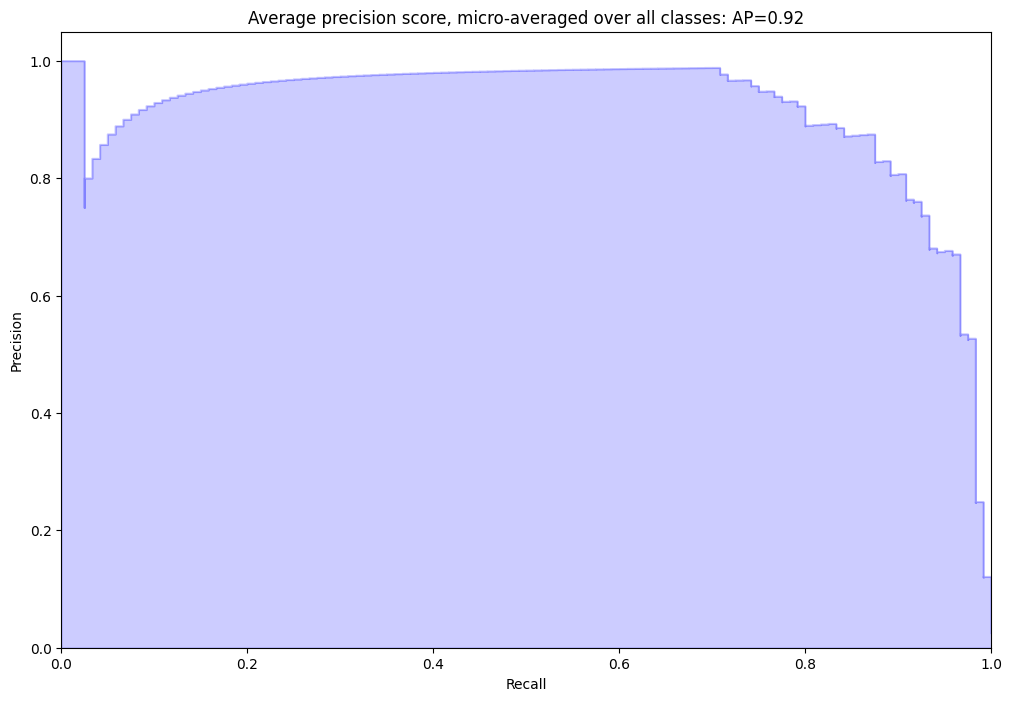

In [142]:
from inspect import signature


step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b',
                 **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))